## değişken ve türleri

**nicel değişken:** sayılarla ifade edilebilinen değişkenlerdir <br>
**nitel değişken:** sayısal olarak ifade edilemeyen, sembollerle ifade edilen değişkenlerdir <br>
**sürekli değişken:** sonsuz sayıda olan değişkenlerdir. örneğin 0 ve 1 arasındaki sonsuz sayıdaki rasyonel sayılar <br>
**süreksiz değişken:** belli bir sayıda, sınırlı sayıda değer alabilen değişkenlerdir. örneğin bir insanın 1 dakikada atladığı ip sayısı <br>

In [1]:
# uygulama
import pandas as pd

nitel = pd.Series(["a","b","c","d"], dtype="category")
print(nitel)

nicel = pd.Series([1,3,5,7,9])
print(nicel)

0    a
1    b
2    c
3    d
dtype: category
Categories (4, object): [a, b, c, d]
0    1
1    3
2    5
3    7
4    9
dtype: int64


## merkezi eğilim ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>

In [2]:
import numpy as np

df = pd.DataFrame()

df["age"] = [28, 42, 27, 24, 35, 54, 35, 37]

rassal = np.append(np.random.normal(69, 8, 100), np.random.normal(64, 5, 100))

print(rassal)

[81.71619871 61.19248625 70.15448014 64.00874932 69.01148239 71.25566359
 51.6658513  70.46492364 69.95750574 61.87587489 84.57038278 60.4660121
 72.19098021 68.72934713 83.12958989 56.60212263 58.02315173 74.94930018
 69.32495027 69.32191428 56.18848228 72.75231601 68.31342104 57.02027223
 65.7916983  54.67917833 86.76137993 70.41605684 68.49588395 68.55502668
 62.37260525 70.23554615 70.66006458 70.6472467  81.05128914 68.09090358
 67.56697056 80.31165437 60.44763852 87.22465622 67.15350067 64.46924295
 75.69734899 75.83091851 57.4348078  70.2052353  60.41138364 71.78342269
 58.68708509 65.40548685 72.01670464 66.1439263  63.72133659 71.4979224
 67.53270844 54.89181594 66.77985149 73.40721738 59.33777645 59.92870822
 75.39904675 63.05061335 72.4380437  53.80768268 67.2667243  63.51558887
 73.00533827 72.23930073 55.6176333  62.19236497 69.17677641 68.32223994
 76.95348573 60.31292742 61.86131543 73.35355683 78.88751953 65.84986222
 69.53995596 64.82587867 64.35400207 55.47893014 55.6

In [3]:
# mean
print("Python mean for \"age\": ", sum(df["age"]) / len(df["age"]))
print("Python mean for \"rassal\": ", sum(rassal) / len(rassal))

print("\nNumpy mean for \"age\": ", np.mean(df["age"]))
print("Numpy mean for \"rassal\": ", np.mean(rassal))

Python mean for "age":  35.25
Python mean for "rassal":  65.48805082459076

Numpy mean for "age":  35.25
Numpy mean for "rassal":  65.48805082459074


In [4]:
# median
import statistics    # Python'un istatistik modülü

print(statistics.median(df["age"]))
print(np.median(df["age"]))

35.0
35.0


In [5]:
# mode:
# Mod değerler arasında en sık geçen değeri gösterir.
# Diğer bir değişle, mod analizi ile veride birden fazla kümelenme olup olmadığı tespit edilir.
# Eğer iki veya daha fazla değer aynı sayıda tekrar ederse çift mod oluşacaktır.
# Aşağıdaki kodu çift mod içeren bir veri ile çalıştırsaydınız hata alabilirdiniz.
# Aşağıdaki kod istisnalar oluşturmadan çift modlu verileri ele alabilecektir, fakat siz ilk modu alacaksınız.

print(statistics.mode(df["age"]))

35


In [6]:
(values, counts) = np.unique(df["age"], return_counts=True, return_index=False)    # https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.unique.html

indx = np.argmax(counts)    # Returns the indices of the maximum values along an axis. https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html

print("values :", values)
print("count :", counts)
print("indx :", indx)
print("values[indx] :", values[indx])    # The most frequent element.


values : [24 27 28 35 37 42 54]
count : [1 1 1 2 1 1 1]
indx : 3
values[indx] : 35


**Yanlılık (bias) hakkında bir not:** Örneklemden hesaplanan ortalama, medyan ve mod popülasyon hakkında tarafsız (yanlı olmayan) bir tahmin olarak düşünülür. Bir tahmin tarafsız ise, örnek popülasyonu en iyi şekilde temsil eder. Taraflı bir gözlem ise popülasyon değerinin ya üstünde ya da altında bir değere yaklaşım gösterecektir. Yanlılık kısaca şu şekilde ifade edilebilir:

***Yanlılık = Örneklem Ortalaması - Popülasyon Ortalaması***

Tarafsız tahmin kullanışlıdır, daha büyük bir grup hakkında genelleme yapabilmek için küçük bir grup üzerinde gözlem yapabilmemizi sağlar. Bu derste gösterdiğimiz uygulamalar aslında örneklem üzerinde yapılmış çalışmalar. Örneklem ve popülasyon üzerinde bu bölümün son dersinde duracağımız için bu küçük notu kısa kesiyoruz.

## dağılım ölçüleri

**En temel merkezi eğilim ölçüleri:** average/mean, median, mod <br>
**En sık kul. dağılım ölçüleri:** varyans(variance), standart sapma(st. deviation), standart hata(st. error) <br>


### variance
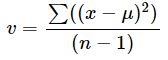
Varyans, her bir veri noktasının ortalamaya olan farkının karelerinin toplamının, gözlem sayısının bir eksiğine bölümü ile bulunur. <br>
Birçok insan ortalamayı bulup onun üzerinde çalışma yaparken, veri bilimciler genellikle varyans üzerinde çalışırlar. Çünkü veri bilimciler araştırma konusu değişkenin neden birbirinden farklı davrandığını anlamaya çalışırlar. Neden bu mağazanın kazanç marjı diğerlerinden çok yüksek? Neden bu ilacın yan etkileri diğer emsal ilaçlara göre çok daha az? Neden bazı müşteriler şirketin web sitesinde daha fazla zaman geçiriyorlar? gibi sorular aslında varyansla ilgilidir. Yüksek varyansa sahip bir değişken gözlemler hakkında farklılıkları ele verir, bu sayede veri bilimciler gelecek çıktıları anlamak için bunları kullanırlar.Burada μ popülasyon ortalamasını temsil etmektedir.

Varyansın hesaplanması ile ilgili iki gariplik var. Neden farkın karesi alınıyor ve neden n ‘e değilde (n-1)’e bölünüyor.

İlk soruya cevap olarak, ortalamaya göre sadece fakları alınsaydı toplamı sıfır olurdu çünkü yarısı negatif, yarısı pozitif olacaktı. Karesini alarak negatif değerleri kullanışlı hale getiriyoruz. Tabi ki mutlak değeri alarak hesaplayabilirdik, bu sayede negatif değerleri kullanabilirdik. Karesini almanın başka matematiksel faydaları var bunu sonra tartışacağız. Neden n-1 aldığımızın cevabı ise yanlılıkla (bias) alakalı olduğundan şimdilik tartışmasına girmiyoruz. _(sanırım Sample grup olunca n-1, tüm populasyon olunca n alıyorduk, ondan.)_

In [7]:
print("Numpy variance: ", np.var(df["age"], ddof=1))    # “Delta Degrees of Freedom”: the divisor used in the calculation is N - ddof, where N represents the number of elements. By default ddof is zero.
print("Pandas variance: ", df["age"].var())    ## variance neyi ifade ediyor?

Numpy variance:  92.5
Pandas variance:  92.5


### standard deviation
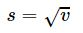
Değişkenliği ölçmekte en çok kullanılan göstergelerden birisi varyansın karekökünün alınmasıdır, buna standart sapma adını veririz.

In [8]:
np.std(df["age"], ddof=1)    # popülasyon için ddof=0 idi, default değeri zaten

9.617692030835672

### standard error
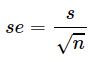
Verideki değişkenliğin tespitinde sıklıkla kullanılan diğer bir gösterge ise standart hatadır. Standart hata örneklem ortalamasının belirsizliğinin bir ölçüsüdür. Standart sapma bize varyans hakkında bilgi verirken, standart hata bize ortalama hakkında bilgi verir.

Anket sonuçları standart hata kullanımı için güzel bir örnektir. Genellikle hata marjı olarak bilinir. Örneğin bir anket sonucu %44 ‘ün X ‘i desteklediğini söyler ve %3 standart hata olabileceğini söyler. Diğer bir deyişle seçim bittiğinde sonuçlar %41 ile %47 arasında olabilir demektir. Standart hata ne kadar küçük olursa ortalamanın bize daha kesin ölçüldüğünü anlatır.

Standart hata, standart sapmanın gözlem sayısının kareköküne bölünmesiyle bulunur:

In [9]:
np.std(df["age"], ddof=1) / np.sqrt(len(df["age"]))

3.4003676271838605

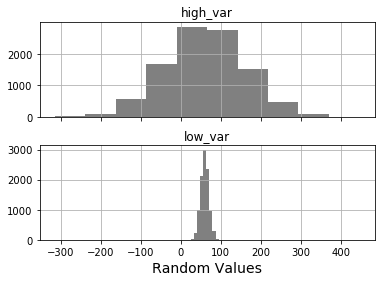

Max values :
 high_var    446.572735
low_var      94.550768
dtype: float64

Min values :
 high_var   -315.122813
low_var      16.701735
dtype: float64


In [10]:
import matplotlib.pyplot as plt

pop = pd.DataFrame()

# Ortalaması 60, standart sapması 10 ve 100 olan iki değişkenin oluşturulması
pop["high_var"] = np.random.normal(60, 100, 10000)
pop["low_var"] = np.random.normal(60, 10, 10000)

pop.hist(layout=(2,1), sharex=True, color="gray")    # sharex: share the x axis
plt.xlabel("Random Values", fontsize=14)
plt.show()

print("Max values :\n", pop.max())
print("\nMin values :\n", pop.min())

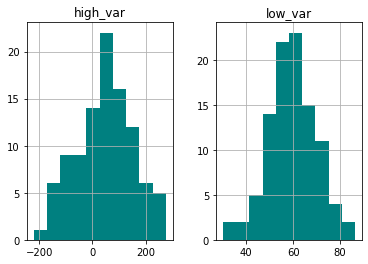

Mean values:
 high_var    48.534604
low_var     59.361565
dtype: float64

Standard Deviation:
 high_var    108.939466
low_var      10.255447
dtype: float64


In [11]:
# şimdi yukarıdaki popülasyondan 100'er örnek alacağız
sample = pd.DataFrame()
sample["high_var"] = np.random.choice(pop["high_var"], 100)   # 100 adet rastgele seçim
sample["low_var"] = np.random.choice(pop["low_var"], 100)

sample.hist(color="teal", layout=(1,2))
plt.show()

print("Mean values:\n", sample.mean())
print("\nStandard Deviation:\n", sample.std(ddof=1))

Örneklem popülasyondan rastgele seçildiği için, kodu her seferinde tekrar çalıştırabilir ve yeni örneklem üzerinde deneyebilirsiniz. Birkaç kere denemenizi tavsiye ederiz. Düşük değişkenliğe sahip örneklemin popülasyon ortalamasına ve standart sapmasına, yüksek değişkenliğe sahip örneklemden daha yakın olduğunu göreceksiniz.

Popülasyondan her örneklem seçildiğinde, dağılımın en uç noktalarından değerler (outlier) çekme ihtimalimiz var. En uç noktalardan değer almak örneklemin ortalamasını popülasyon ortalamasından uzaklaştırabilir. Bu yüzden yüksek değişkenlikli değişkenlerin düşüklere göre ortalamadan uzaklaşma potansiyelleri daha fazladır. Bu sorunu mümkün olduğunca örneklem sayısını artırarak giderebiliriz. Bunu ilerde detaylı bir şekilde tartışacağız.

## alıştırma

In [12]:
# pandas ve numpy'ı yukarıda import etmiştik.
data = pd.DataFrame()
data["Gender"] = ["male"]*100 + ["female"]*100
data["Weight"] = np.append(np.random.normal(69,8,100), np.random.normal(64,5,100))
data["Height"] = np.append(np.random.normal(195,25,100), np.random.normal(166,15,100))
data.info()    # verinin yapısı ile ilgili bilgi edinme

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  200 non-null    object 
 1   Weight  200 non-null    float64
 2   Height  200 non-null    float64
dtypes: float64(2), object(1)
memory usage: 4.8+ KB


In [13]:
data.head(3)    # ilk "n" satır. boş bırakırsan default olarak n=5 alıyor.

,Gender,Weight,Height
0,male,68.597473,166.214995
1,male,72.146425,206.653055
2,male,75.522932,162.503582


In [14]:
data.head(-190)    # negatif değer: son "n" satır hariç hepsi

,Gender,Weight,Height
0,male,68.597473,166.214995
1,male,72.146425,206.653055
2,male,75.522932,162.503582
3,male,61.754053,150.636630
4,male,74.401049,157.532593
5,male,60.757734,199.858583
6,male,74.430157,239.182518
7,male,64.062518,216.428259
8,male,79.791615,186.632529
9,male,59.042995,204.475991


In [15]:
data.tail()    # son n satır. default n=5

,Gender,Weight,Height
195,female,67.533182,170.260751
196,female,62.804486,170.283069
197,female,62.300122,175.490527
198,female,65.119978,176.675566
199,female,71.838706,168.824666


In [16]:
data.tail(-189)    # ilk n satır hariç son kalanlar

,Gender,Weight,Height
189,female,55.620135,165.665674
190,female,62.771621,180.521118
191,female,58.961830,159.869803
192,female,64.594505,165.680092
193,female,57.967293,160.355854
194,female,65.483383,161.231865
195,female,67.533182,170.260751
196,female,62.804486,170.283069
197,female,62.300122,175.490527
198,female,65.119978,176.675566


In [17]:
print("Height mean: ", data.Height.mean())
print("Weight standard dev: ", data["Weight"].std())    # remember: it works for both dot and bracket notation

Height mean:  181.03864045116956
Weight standard dev:  7.127088880898418


In [18]:
# Ağırlık verilerinin içinde yer alan boşlukların (NaN), verilerin ortalaması ile doldurulması/değiştirilmesi
w_mean = data.Weight.mean()
data["Weight"].fillna(w_mean)
print(f"Ağırlık ortalaması: {w_mean:.2f}")

Ağırlık ortalaması: 67.02
